# Exercício de Visualização de Dados - QXD0178
## Aluno: Ryan Guilherme Morais Nascimento

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopandas as gpd
import folium

# Importando os dados

In [4]:
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$limit=3000000"
data = pd.read_csv(url, parse_dates=['created_date', 'closed_date'])

<ipython-input-4-6ba5d6ba3c38>:2: DtypeWarning: Columns (8,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, parse_dates=['created_date', 'closed_date'])


In [5]:
data.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,64194026,2025-02-26 02:23:02,NaT,DOT,Department of Transportation,Street Condition,Pothole,NaN,10002.0,DELANCEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64189034,2025-02-26 01:50:32,NaT,NYPD,New York City Police Department,Drug Activity,Use Outside,Street/Sidewalk,11366.0,158-33 78 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.722387,-73.809526,"\n, \n(40.72238703289527, -73.8095260418184)"
2,64188911,2025-02-26 01:50:01,NaT,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10460.0,1475 LELAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837019,-73.864400,"\n, \n(40.83701913942673, -73.86439995824941)"
3,64190304,2025-02-26 01:49:55,NaT,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11205.0,81 NORTH PORTLAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695383,-73.976232,"\n, \n(40.69538270128887, -73.97623152066696)"
4,64190292,2025-02-26 01:49:48,NaT,NYPD,New York City Police Department,Traffic,Chronic Speeding,Street/Sidewalk,11366.0,158-33 78 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.722387,-73.809526,"\n, \n(40.72238703289527, -73.8095260418184)"


# Para a posterior visualização dos dados vamos importar o mapa de Nova York dividido pelos distritos

<Axes: >

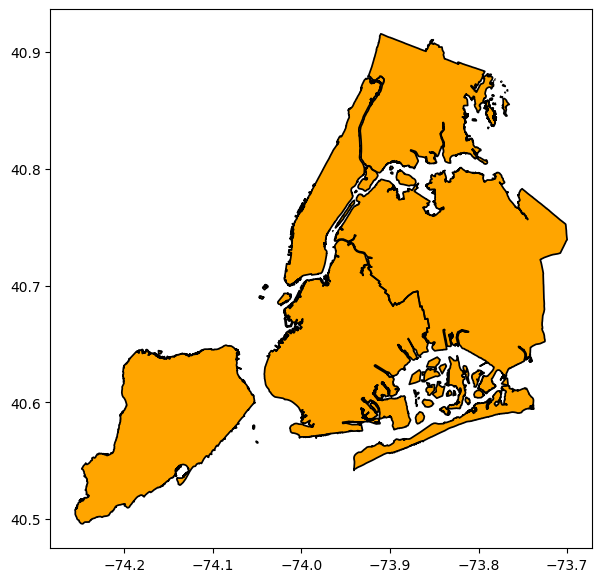

In [6]:
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/new-york-city-boroughs.geojson"
response = requests.get(url)

if response.status_code == 200:
    borough_map = gpd.read_file(BytesIO(response.content))
else:
    raise Exception("Erro ao baixar o arquivo GeoJSON")

fig, ax = plt.subplots(figsize=(7, 7))

borough_map['geometry'].boundary.plot(edgecolor='black', linewidth=1.25, ax=ax)
borough_map.plot(color='orange', alpha=1, ax=ax)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 41 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   unique_key                      int64         
 1   created_date                    datetime64[ns]
 2   closed_date                     datetime64[ns]
 3   agency                          object        
 4   agency_name                     object        
 5   complaint_type                  object        
 6   descriptor                      object        
 7   location_type                   object        
 8   incident_zip                    object        
 9   incident_address                object        
 10  street_name                     object        
 11  cross_street_1                  object        
 12  cross_street_2                  object        
 13  intersection_street_1           object        
 14  intersection_street_2           object        
 15

# Vamos listar todos os tipos de reclamações e a quantidade de cada uma

In [7]:
data['complaint_type'].value_counts()

,count
complaint_type,
Illegal Parking,424596
Noise - Residential,384366
HEAT/HOT WATER,248495
Noise - Street/Sidewalk,146343
Blocked Driveway,141079
...,...
Tanning,1
Facade Insp Safety Pgm,1
Stalled Sites,1


# Nota-se que os problemas mais recorrentes nas ligações do 311 de Nova York são referentes a estacionamento ilegal, barulho e aquecimento:

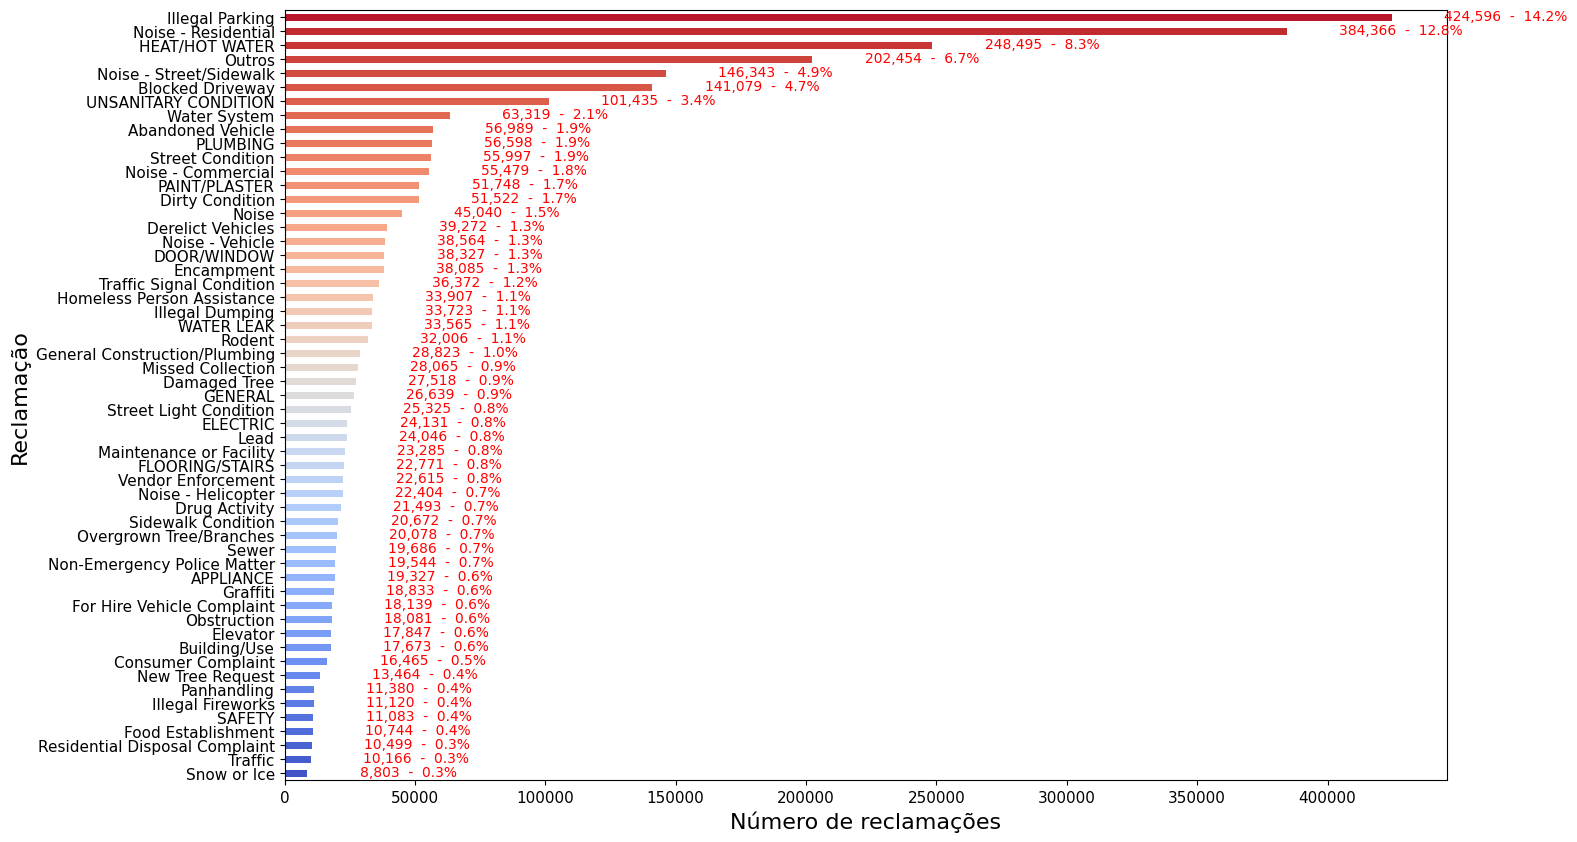

In [9]:
data_copy = data.copy()

# find the name of the less common complaints and rename all corresponding rows
idx = data['complaint_type'].value_counts().sort_values().head(140).index
data_copy.loc[data_copy['complaint_type'].isin(idx), 'complaint_type'] = 'Outros'

df_complaints = data_copy['complaint_type'].value_counts().sort_values()

df_complaints.plot(kind = 'barh', figsize = (15, 10), fontsize = 11, color = sns.color_palette('coolwarm', len(df_complaints)))
plt.ylabel('Reclamação', fontsize = 16)
plt.xlabel('Número de reclamações', fontsize = 16)

# Adicionar valor com porcentagem total ao lado da barra
for index, value in enumerate(df_complaints):
    label = str(format(int(value), ',')) + '  -  {}%'.format(round( (value/df_complaints.sum())*100, 1))
    plt.annotate(label, xy = (value + 20000, index - 0.2 ), color = 'red')

# Vamos observar o gráfico de cada um individualmente:

<ipython-input-8-66fd85e14fa7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_parking_counts.index, y=borough_parking_counts.values, palette='rocket')


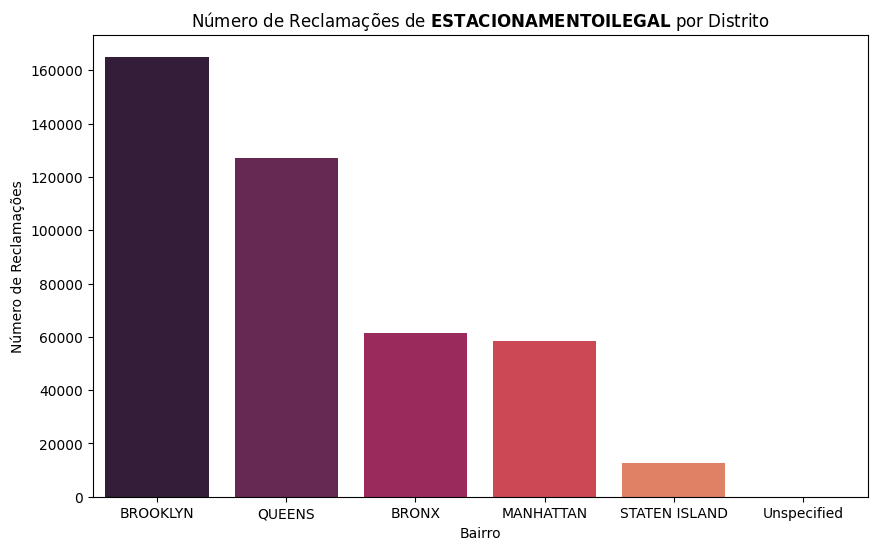

<ipython-input-8-66fd85e14fa7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_noise_counts.index, y=borough_noise_counts.values, palette='viridis')


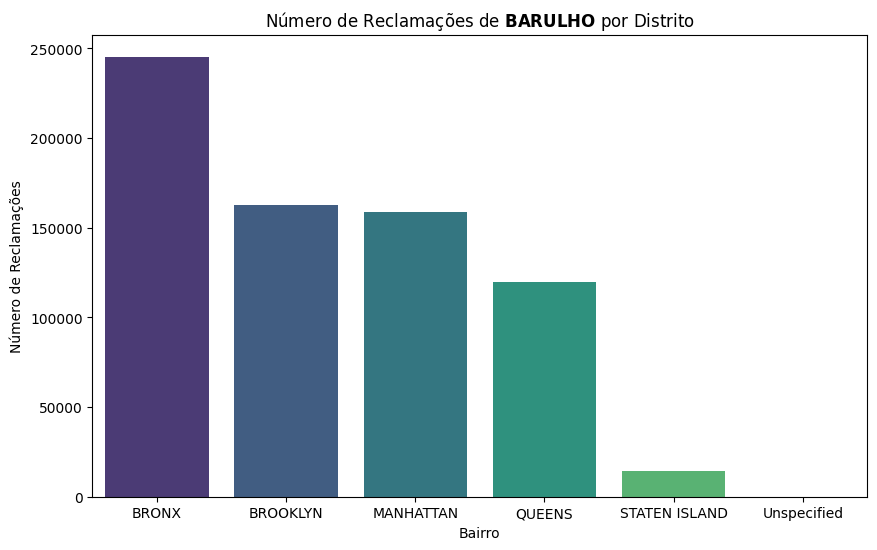

<ipython-input-8-66fd85e14fa7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_heat_counts.index, y=borough_heat_counts.values, palette='coolwarm')


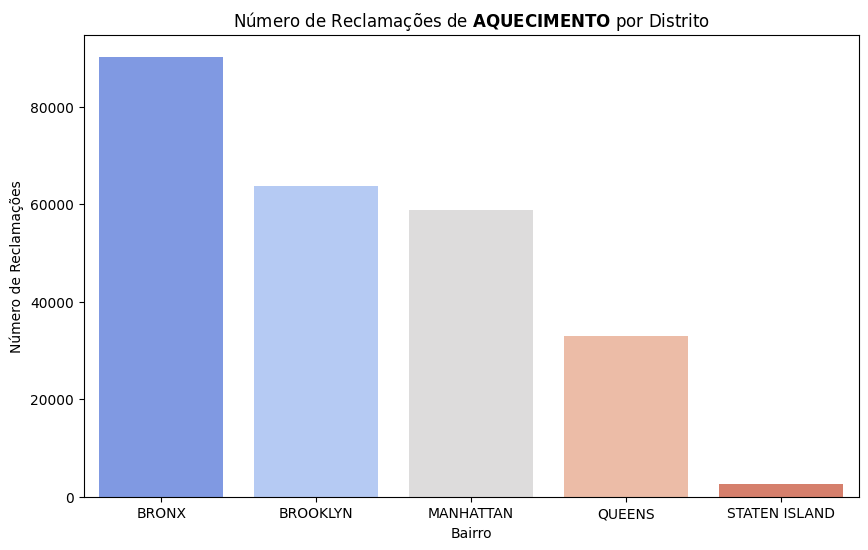

In [8]:
parking_complaints = data[data['complaint_type'].str.contains('Illegal Parking', case=False, na=False)]
noise_complaints = data[data['complaint_type'].str.contains('Noise', case=False, na=False)]
heat_complaints = data[data['complaint_type'].str.contains('HEAT/HOT WATER', case=False, na=False)]

parking_complaints['complaint_type'].value_counts()
noise_complaints['complaint_type'].value_counts()
heat_complaints['complaint_type'].value_counts()

borough_parking_counts = parking_complaints['borough'].value_counts()
borough_noise_counts = noise_complaints['borough'].value_counts()
borough_heat_counts = heat_complaints['borough'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=borough_parking_counts.index, y=borough_parking_counts.values, palette='rocket')
plt.title('Número de Reclamações de $\mathbf{ESTACIONAMENTO ILEGAL}$ por Distrito')
plt.xlabel('Bairro')
plt.ylabel('Número de Reclamações')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=borough_noise_counts.index, y=borough_noise_counts.values, palette='viridis')
plt.title('Número de Reclamações de $\mathbf{BARULHO}$ por Distrito')
plt.xlabel('Bairro')
plt.ylabel('Número de Reclamações')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=borough_heat_counts.index, y=borough_heat_counts.values, palette='coolwarm')
plt.title('Número de Reclamações de $\mathbf{AQUECIMENTO}$ por Distrito')
plt.xlabel('Bairro')
plt.ylabel('Número de Reclamações')
plt.show()

## Obs: Há épocas onde há um pico de reclamações referentes a neve e gelo, porém, faremos uma análise generalizada então não iremos considerá-las como um dos principais problemas

In [10]:
data['Year'] = data['created_date'].dt.year
data.groupby(['Year'])['complaint_type'].agg(pd.Series.mode)

,complaint_type
Year,
2024,Illegal Parking
2025,HEAT/HOT WATER


# Baseado no que foi analisado, iremos considerar o problema de aquecimento / aquecimento de água para as análises posteriores para responder a seguinte pergunta: *Qual distrito possui mais reclamações sobre aquecimento e quais os meses onde esse tipo de reclamação é mais recorrente em Nova York?*

## Motivação da pergunta: Dentre as 3 principais reclamações, essa é a mais urgente que envolve saúde pública visto que pessoas em situaçao crítica podem vir a falecer devido a falta de aquecimento

## Agora vamos analisar quais reclamações são as mais recorrentes em cada distrito e rua individualmente

In [9]:
data_top_complaints = data[['borough', 'incident_zip', 'street_name', 'latitude', 'longitude', 'complaint_type']]
data_top_complaints = data_top_complaints[data_top_complaints['complaint_type'] == 'HEAT/HOT WATER']

data_top_complaints.head()

,borough,incident_zip,street_name,latitude,longitude,complaint_type
324,MANHATTAN,10037.0,LENOX AVENUE,40.819249,-73.937114,HEAT/HOT WATER
331,BROOKLYN,11238.0,CLERMONT AVENUE,40.683304,-73.968891,HEAT/HOT WATER
335,MANHATTAN,10040.0,ELLWOOD STREET,40.861500,-73.929247,HEAT/HOT WATER
338,QUEENS,11372.0,95 STREET,40.752784,-73.872562,HEAT/HOT WATER
340,BRONX,10458.0,CAMBRELENG AVENUE,40.855752,-73.884381,HEAT/HOT WATER


In [10]:
data_top_complaints['borough'].value_counts()

,count
borough,
BRONX,90279
BROOKLYN,63812
MANHATTAN,58748
QUEENS,33057
STATEN ISLAND,2599


# Nota-se que Bronx, Brooklyn e Manhattan são, respectivamente, os 3 distritos com maior incidência de reclamações de aquecimento, para uma visualização mais adequada vamos visualizar diretamente no mapa:

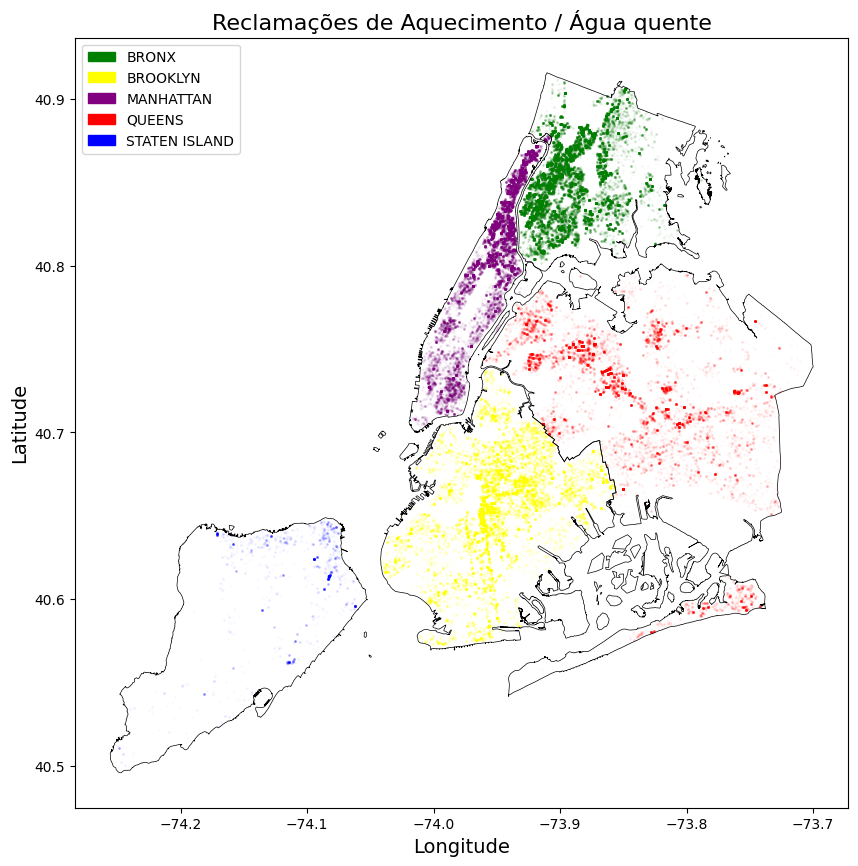

In [20]:
import matplotlib.patches as mpatches
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/new-york-city-boroughs.geojson"
response = requests.get(url)

if response.status_code == 200:
    borough_map = gpd.read_file(BytesIO(response.content))
else:
    raise Exception("Erro ao baixar o arquivo GeoJSON")

borough_map['geometry'].boundary.plot(edgecolor='firebrick', linewidth=1, ax=ax)
borough_map.plot(color='grey', alpha=0.7, ax=ax)

plt.show()

boroughs = list(data_top_complaints['borough'].value_counts().index)
colors = ['green', 'yellow', 'purple', 'red', 'blue', 'darkgrey']
patches = []

fig, ax = plt.subplots(figsize = (10, 10))

for index, value in enumerate(boroughs):
    borough_df = data_top_complaints[data_top_complaints['borough'] == value]
    ax.scatter(borough_df['longitude'], borough_df['latitude'], c = colors[index], s = 1, alpha = 0.02, marker = '*')
    patches.append(mpatches.Patch(label = value, color = colors[index]))

borough_map['geometry'].boundary.plot(edgecolor = 'black', linewidth = 0.5, ax = ax)

plt.title("Reclamações de Aquecimento / Água quente", size = 16)
plt.xlabel('Longitude', size = 14)
plt.ylabel('Latitude', size = 14)
plt.legend(patches, boroughs);

## Para uma visualização gráfica e específica, vamos ver um gráfico de barras referente aos dados acima

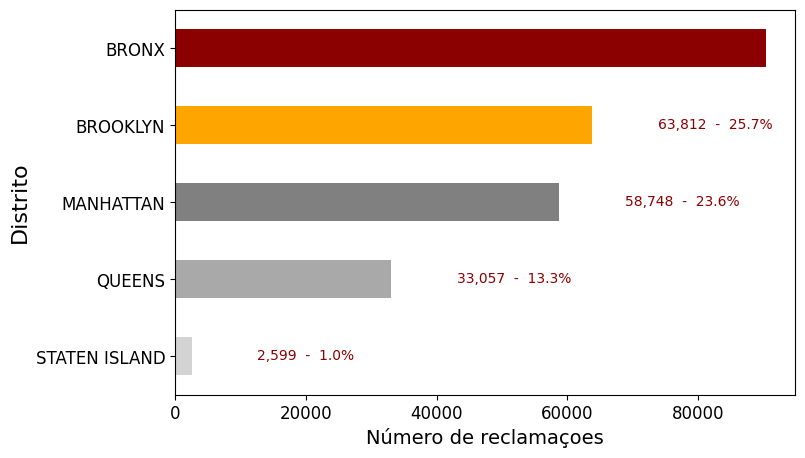

In [44]:
colors = ['lightgrey', 'darkgrey', 'grey', 'orange', 'darkred']
ny_borough = data_top_complaints['borough'].value_counts().sort_values()

ny_borough.plot(kind = 'barh', figsize = (8, 5), fontsize = 12, color = colors)
plt.ylabel('Distrito', fontsize = 16)
plt.xlabel('Número de reclamaçoes', fontsize = 14)

for index, value in enumerate(ny_borough):
    label = str(format(int(value), ',')) + '  -  {}%'.format(round( (value/ny_borough.sum())*100, 1))
    plt.annotate(label, xy = (value + 10000, index - 0.05), color = 'darkred')

# Deste modo, concluímos que o Bronx é o distrito com mais incidências de reclamações referentes a aquecimento, com uma diferença considerável para o segundo distrito

# Para um detalhamento melhor das reclamações, podemos verificar qual parcela das reclamações de aquecimento é referente à todo um edifício ou apenas a um apartamento:

<ipython-input-51-e59467827b41>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaint_type_counts.values, y=complaint_type_counts.index, palette='flare')


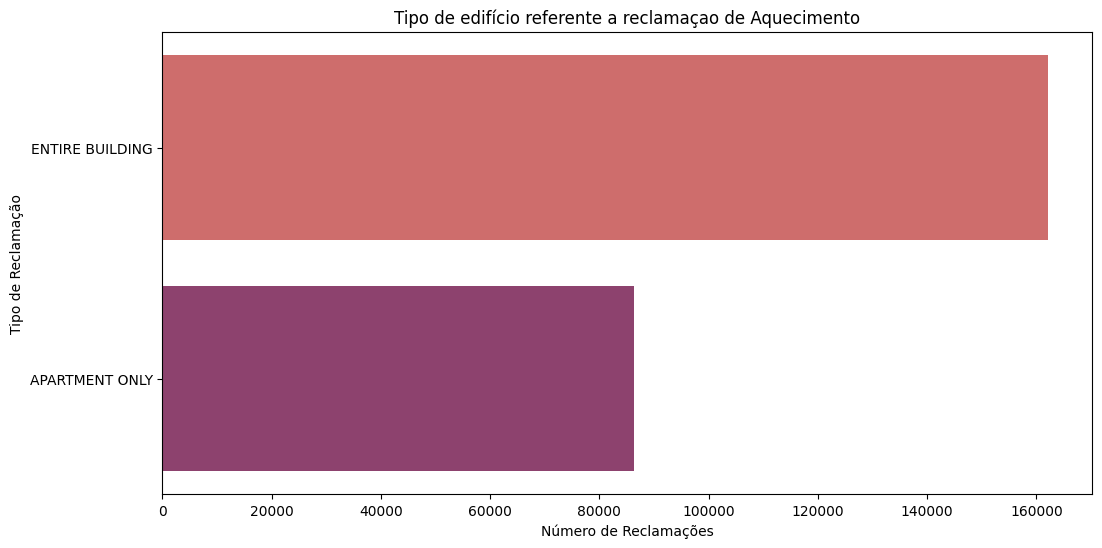

In [51]:
complaint_type_counts = heat_complaints['descriptor'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=complaint_type_counts.values, y=complaint_type_counts.index, palette='flare')
plt.title('Tipo de edifício referente a reclamaçao de Aquecimento')
plt.xlabel('Número de Reclamações')
plt.ylabel('Tipo de Reclamação')
plt.show()

In [53]:
complaint_type_counts.head()

,count
descriptor,
ENTIRE BUILDING,162136
APARTMENT ONLY,86359


## Nota-se que o número de reclamaçoes sobre aquecimento referente à um edifício inteiro é aproximadamente o dobro das reclamações referentes à uma única moradia, isso implica que o problema de aquecimento impacta um número consideravelmente maior de pessoas do que se pode compreender pelos gráficos.

# Agora podemos verificar quais meses possuem maior incidência de reclamações referentes a aquecimento em Nova York:

<ipython-input-21-20c382442b94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_complaints['year_month'] = heat_complaints['created_date'].dt.to_period('M')


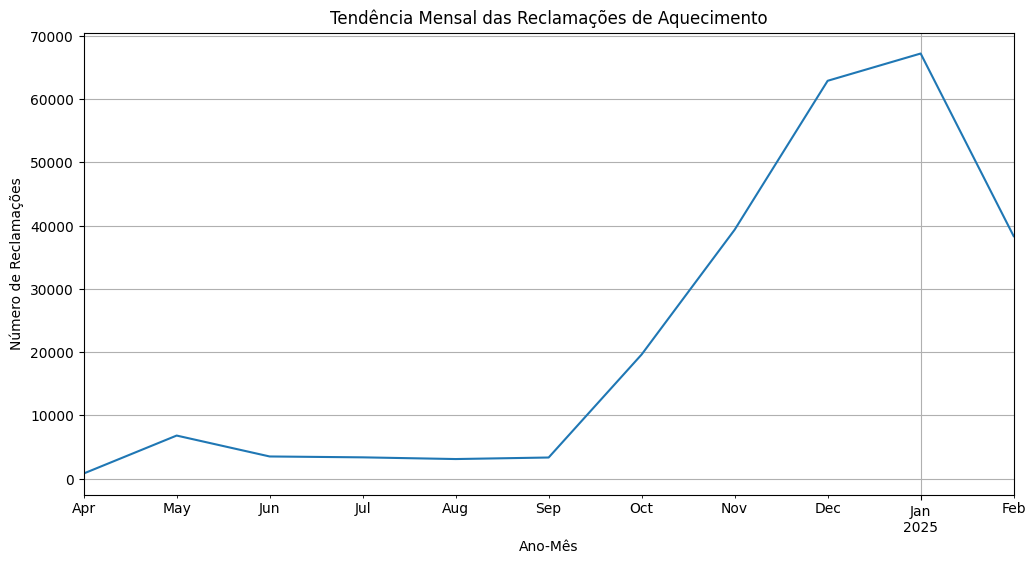

In [21]:
heat_complaints['year_month'] = heat_complaints['created_date'].dt.to_period('M')

monthly_trend = heat_complaints['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line')
plt.title('Tendência Mensal das Reclamações de Aquecimento')
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Reclamações')
plt.grid(True)
plt.show()

# Deste modo, conclui-se que o distrito com maior incidência de reclamações de Aquecimento em Nova York é o Bronx, e que há uma incidência maior de reclamações com um crescimento gradativo de Setembro até Dezembro.

In [23]:
# converter para html para exportar para pdf com formatação melhor
!jupyter nbconvert --to html /content/MiningFinal.ipynb

[NbConvertApp] Converting notebook /content/MiningFinal.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 1382110 bytes to /content/MiningFinal.html
